# Sınıflandırma Problemleri için Hata Metrikleri

Bu dersin sonunda şunları yapabiliyor olmayı hedefliyoruz:

1. Accuracy değerinin neden her zaman çözüm olmadığını anlamak
2. Confusion Matrix(Hata Matrisi)'i anlamak
3. Precision ile Recall arasındaki farkı anlamak
4. Threshold değerini değiştirmenin modeli nasıl etkileri olacağını anlamak
5. ROC Curve & AUC kavramlarını anlamak

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

## Iris Veri Seti: KNN & Logistic Regresyon

In [2]:
iris_dataset = datasets.load_iris()
iris_dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# Veriyi Train ve Test Veri Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                            test_size=0.3, random_state=42)

In [4]:
# KNN modelini oluşturma

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

print('KNN Training Score: {:6.2f}%'.format(100*knn.score(X_train_transformed, y_train)))
print('KNN Test Score: {:6.2f}%'.format(100*knn.score(X_test_transformed, y_test)))

KNN Training Score:  95.24%
KNN Test Score: 100.00%


In [5]:
# Logistic Regresyon modelini oluşturma
logit = LogisticRegression(solver='liblinear')
logit.fit(X_train_transformed, y_train)

print('LogReg Training Score: {:6.2f}%'.format(100*logit.score(X_train_transformed, y_train)))
print('LogReg Test Score: {:6.2f}%'.format(100*logit.score(X_test_transformed, y_test)))

LogReg Training Score:  88.57%
LogReg Test Score:  91.11%


**KNN** algoritması en yakın komşularının sınıflarına bakarak bir tahmin gerçekleştirirken, **Logistic Regresyon** algoritması yaptığı sınıf tahminlerini olasılıklara dayandırır. O zaman hadi, ilk birkaç gözlemde hesaplanan olasılıkları inceleyelim.

In [6]:
knn.predict_proba(X_test_transformed[:5,]) # [Setosa, Versicolor, Virginica]

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2]])

In [7]:
np.set_printoptions(suppress=True, precision=2) # Üretilen çıktıyı istenilen formata getirme
logit.predict_proba(X_test_transformed[:5,]) # [Setosa, Versicolor, Virginica]

array([[0.05, 0.69, 0.26],
       [0.96, 0.04, 0.  ],
       [0.  , 0.41, 0.59],
       [0.05, 0.5 , 0.45],
       [0.02, 0.59, 0.4 ]])

- Peki test veri setimizdeki 5. gözlemimizin label değeri gerçekte neymiş?

In [8]:
print(f'Features: {X_test_transformed[4]}, Label: {y_test[4]}')  # 4. indexe ait gözleme bakalım

Features: [ 1.15 -0.5   0.54  0.22], Label: 1


Şimdi de bu 2 modelimizin bize vermiş olduğu hata matrislerini inceleyelim.

In [9]:
print('KNN Confusion Matrix: \n\n', confusion_matrix(y_test, knn.predict(X_test_transformed)))

KNN Confusion Matrix: 

 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


- KNN modelini incelediğimizde, `setosa` ve `versicolor` çiçeğini gayet başarılı bir şekilde tahmin etmiş gibi durmasına rağmen, `virginica` çiçeğinde ise **2 tane hatalı tahmin(versicolor)** yaptığını görüyoruz.

In [10]:
print('Logistic Regression Confusion Matrix: \n\n', confusion_matrix(y_test, logit.predict(X_test_transformed)))

Logistic Regression Confusion Matrix: 

 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


- Aynı şekilde Logistic Regresyon modelini incelediğimizde ise, bu sefer `setosa` ve `virginica` çiçeğini gayet başarılı bir şekilde tahmin etmiş gibi durmasına rağmen, `versicolor` çiçeğinde ise **1 tane hatalı tahmin(virginica)** yaptığını görüyoruz.

Oluşturduğumuz bu hata matrislerini daha iyi yorumlayabilmek için `sns.heatmap` özelliğinden yararlanarak çıktımızı biraz daha güzelleştirelim.

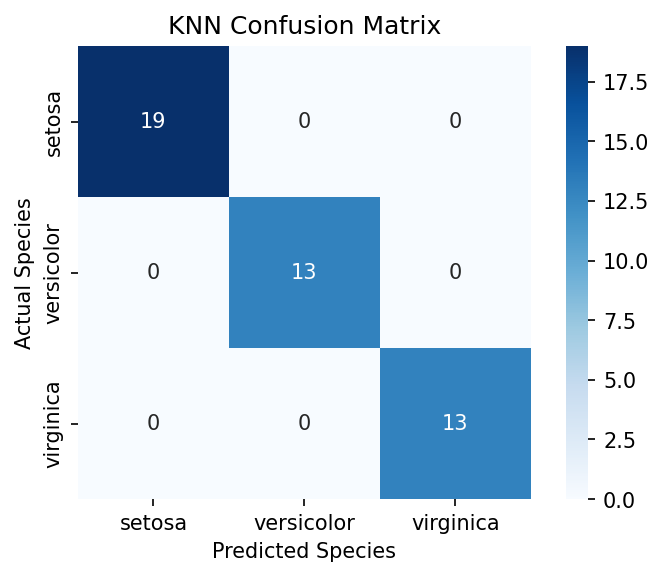

In [11]:
knn_confusion = confusion_matrix(y_test, knn.predict(X_test_transformed))

plt.figure(dpi=150)
plt.title('KNN Confusion Matrix')
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species');

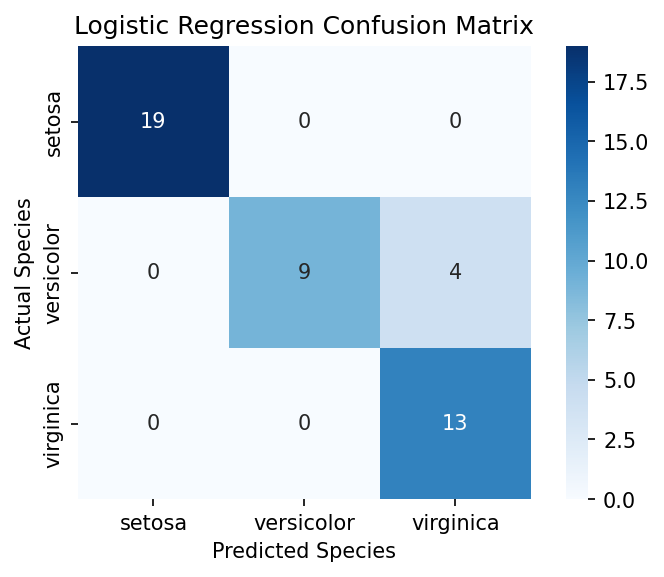

In [12]:
logit_confusion = confusion_matrix(y_test, logit.predict(X_test_transformed))

plt.figure(dpi=150)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=iris_dataset['target_names'],
           yticklabels=iris_dataset['target_names'])
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species');

> **SORU:** Peki neden accuracy değeri bizim için bazı durumlarda gerekli anlamı ifade etmez?

Şimdi bu durumu biraz daha iyi anlamak için örnek bir kredi kartı veri setini inceleyelim.

## Kredi Kartı Veri Seti

In [13]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', skiprows=1)
df.drop(columns='ID', inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Veri setini incelediğimizde `default payment next month` sütununda, kişilerin kredi kartı borçlarını ödeme şekillerine ilişkin bir sınıf bilgisi olduğunu görüyoruz. Bu çalışmamızda da bu alanı tahmin etmeye çalışıyor olacağız. Ama öncesinde label sütunumuzun dağılımına bakalım.

In [15]:
df['default payment next month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

> **SORU:** Veri setlerimizde sınıflarımızın dağılımlarına baktığımızda arada ciddi bir fark olduğunu görüyoruz. Sizce bu tarz durumlar bizim için nelere sebep olabilir?

Şimdi ilk modelimizi hazırlayalım ve sonrasında hata matrisinde bize getirmiş olduğu sonuçları değerlendirelim.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:, -1], test_size=0.20, random_state=42)

X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_transformed, y_train)

LogisticRegression(solver='liblinear')

In [17]:
def evaluate_model(model, X, y, pred_label=1):

    """
    This function evaluates your model and interprets the classification metrics results in a DataFrame format.
    
    Input
    ---------
    model: Classification Model
    X: Features
    y: Label
    pred_label: Which label will be used for interprets the results
        
    Output
    -------
    metric_df: Result DataFrame
    """
    
    y_pred = model.predict(X)

    accuracy = round(accuracy_score(y, y_pred), 3)
    recall = round(recall_score(y, y_pred, pos_label = pred_label), 3)
    precision = round(precision_score(y, y_pred, pos_label = pred_label), 3)
    f1 = round(f1_score(y, y_pred, pos_label = pred_label), 3)
    auc_score = round(roc_auc_score(y, y_pred), 3)

    metric_df = pd.DataFrame([accuracy, recall, precision, f1, auc_score]).T
    metric_df.index = ["Class " + str(pred_label)]
    metric_df.columns = ["Accuracy", "Recall", "Precision", "F1 Score", "AUC Score"]

    return metric_df

In [18]:
evaluate_model(logreg, X_test_transformed, y_test, pred_label=0)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 0,0.81,0.971,0.819,0.889,0.603


In [19]:
evaluate_model(logreg, X_test_transformed, y_test, pred_label=1)

,Accuracy,Recall,Precision,F1 Score,AUC Score
Class 1,0.81,0.236,0.692,0.352,0.603


Şimdi ise modelimizin farklı threshold değerlerinde nasıl davrandığını daha rahat görebilmek için bir `make_confusion_matrix` fonksiyonu tanımlayalım ve oluşan değişikleri onun üzerinden gözlemleyelim.

> **HATIRLATMA:** Logistic Regresyon modelleri biz değiştirmediğimiz sürece binary classification problemlerinde, girdilerin hangi sınıfa ait olması gerektiğini belirlerken threshold değerlerini her zaman **%50 yani 0.50** olarak belirler.

In [20]:
def make_confusion_matrix(model, threshold=0.5): # Ön tanımlı threshold değeri
    
    y_predict = (model.predict_proba(X_test_transformed)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Legit', 'Fraud'],
           yticklabels=['Legit', 'Fraud']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

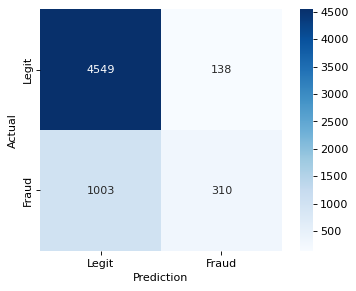

In [21]:
make_confusion_matrix(logreg)

Oluşturduğumuz model sonucunda accuracy değerini **0.81** olarak hesaplanmasına rağmen, hata matrisini incelediğimizde pek istediğimiz bir sonuçla karşılaşamadık. Modelimiz **şüpheli işlemleri yakalamakta oldukça zorlanıyor** gibi duruyor :(

>**SORU:** Peki sizce bu durumu nasıl düzeltebiliriz?

In [22]:
# Threshold değerini değiştirdiğimizde sonucun da interaktif bir şekilde değişmesi için bir widget

from ipywidgets import interactive

interactive(lambda threshold: make_confusion_matrix(logreg, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

> **SORU:** Threshold değerini değiştirdiğimizde bu sonucu nasıl etkiledi? Örneğin **0.10** threshold değerindeki sonuç için ne yorumu yapabilirsiniz?

### Örnek: Threshold = 0.5 

| Confusion Matrix            | Predicted Negative (Legit) | Predicted Positive (Fraud) | Total |
|-----------------------------| -------------------------- | -------------------------- | ----- |
| **Actual Negative (Legit)** | 71058                      | 11                         | 71069 |
| **Actual Positive (Fraud)** | 47                         | 86                         | 133   |
| **Total**                   | 71105                      | 97                         | 71202 |


**Precision:**
$$\text{Precision} = \frac{TP}{\text{Predicted Positive}} = \frac{86}{86+11} = 0.887$$

Pozitif olarak tahmin ettiğimiz işlemlerin **yaklaşık %88'i** gerçekten de pozitifmiş!

**Recall:**
$$\text{Recall} = \frac{TP}{\text{Actual Positives}} = \frac{86}{86+47} = 0.647$$

Gerçekte pozitif olan işlemlerin ise ancak **yaklaşık %64'ünü** pozitif olarak tahmin etmişiz!


### Örnek: Threshold = 0.10

| Confusion Matrix            | Predicted Negative (Legit) | Predicted Positive (Fraud) | Total |
|-----------------------------| -------------------------- | -------------------------- | ----- |
| **Actual Negative (Legit)** | 71039                      | 30                         | 71069 |
| **Actual Positive (Fraud)** | 23                         | 110                        | 133   |
| **Total**                   | 71062                      | 140                        | 71202 |


**Precision:**
$$\text{Precision} = \frac{TP}{\text{Predicted Positive}} = \frac{110}{110+30} = 0.785$$

**Recall:**
$$\text{Recall} = \frac{TP}{\text{Actual Positives}} = \frac{110}{110+23} = 0.827$$

- Yani threshold değerini düşürdüğümüzde; pozitif olarak tahmin ettiğimiz işlemlerin başarısından biraz feragat ederek, gerçek pozitif olan işlemleri yakalamadaki başarımızı arttırmış olduk. Burada **hangisini seçeceğimiz tamamen bizim projeyi yapma amacımıza göre değişir!**

In [23]:
# Herhangi bir parametre tanımlamadığımızda 0.5 threshold değerine göre tahminlerini gerçekleştiriyor
y_predict = logreg.predict(X_test_transformed)
print('Default Threshold: 0.5')
print('Precision: {:6.3f},   Recall: {:6.3f}'.format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default Threshold: 0.5
Precision:  0.692,   Recall:  0.236


In [24]:
# 0.10 threshold değerine göre sınıflandırma
new_threshold = 0.10
y_predict = (logreg.predict_proba(X_test_transformed)[:,1] > new_threshold)
print('New Threshold:', new_threshold)
print('Precision: {:6.3f},   Recall: {:6.3f}'.format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

New Threshold: 0.1
Precision:  0.243,   Recall:  0.906


Şimdi threshold değerini her değiştirdiğimizde **precision** ve **recall** değerlerinin bundan nasıl etkilendiğini inceleyelim.

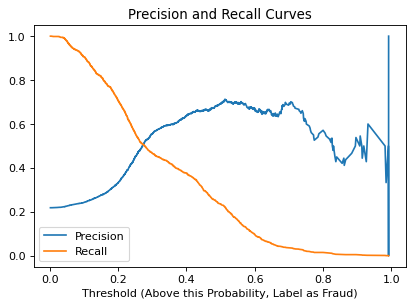

In [25]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logreg.predict_proba(X_test_transformed)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='Precision')
plt.plot(threshold_curve, recall_curve[1:], label='Recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (Above this Probability, Label as Fraud)');
plt.title('Precision and Recall Curves');

## F1 Score: Precision & Recall

Hem precision hem de recall değerini olabildiğince yüksek tutmak istediğimiz senaryolarda, bu isteğimizi karşılamak için **F1 Score**'dan yararlanabiliriz.

$$F_1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}} = 2 \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}$$


Örneğin **precision = 0.8810**, **recall = 0.6218** olan bir durumda **F1 Score**:

$$F_1 = 2\frac{(0.8810)(0.6218)}{0.8810 + 0.6218} = 0.7290$$

In [26]:
# Threshold'un 0.10 olarak belirlendiği tahminlerdeki doğruluk metrikleri
print('Precision:', round(precision_score(y_test, y_predict),3))
print('Recall:', round(recall_score(y_test, y_predict),3))
print('F1 Score:', round(f1_score(y_test, y_predict),3))

Precision: 0.243
Recall: 0.906
F1 Score: 0.383


## ROC Curve

ROC Curve'deki amacımız **TPR'i olabildiğince yüksek tutup, aynı zamanda FPR'i de olabildiğince düşük tutmaktı**. Bu konuda ne kadar başarılı olduğumuzu da **AUC(Area Under Curve)** değerini inceleyerek kolayca karar verebiliriz.

ROC AUC Score= 0.727


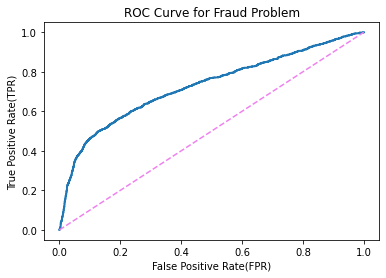

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test_transformed)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve for Fraud Problem');
print("ROC AUC Score=", round(roc_auc_score(y_test, logreg.predict_proba(X_test_transformed)[:,1]),3))

## Log-Loss Fonksiyonu

Hatırlarsanız `Sınıflandırma_Problemleri_&_Logistic_Regresyon` dersimizde **Cross-Entropy** hakkında konuşmuştuk. Tekrardan hatırlayacak olursak Cross-Entropy, Logistic Regresyon modellerimizdeki tahminlerin gerçek değere olan uzaklıklarını cezalandırdığımız bir kavramdı. 

İşte modelimizin bu konudaki performansını da **Log-Loss** değeriyle değerlendirebiliriz. Log-Loss değeri bize modelimizdeki tahmin olasılıklarının ne kadar gerçeğe yakın olduğunu söyler ve binary classication problemleri için şu şekilde tanımlanır:

$$ LLCE = - \sum_{i=1}^{N} y \cdot log(p_{y}) + (1-y) \cdot log((1-p_{y}))$$

Buradan hesaplanan değerlerin **0'a yakın olması** sınıf tahminlerinin oldukça yüksek olasılıklarla gerçekleştiğini söylerken, **1'e yakın olması** ise modeldeki tahminlerin oldukça kararsız oldukları hakkında bilgi verir.

In [28]:
from sklearn.metrics import log_loss

print("Log-Loss on LogReg: {:6.3f}".format(log_loss(y_test, logreg.predict_proba(X_test_transformed))))

Log-Loss on LogReg:  0.463


> **SORU:** Burada hesaplanan Log-Loss değerinden nasıl bir çıkarım yapabiliriz?